In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import math
import nltk

raw_data = pd.read_csv('./solution/ML Challenge Data.csv')

/home/tyler/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Exploratory Data Analysis

In [3]:
print(raw_data.info())
print(raw_data.shape)
raw_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101270 entries, 0 to 101269
Data columns (total 3 columns):
estimated_hours    35172 non-null float64
name               101270 non-null object
price              101270 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.3+ MB
None
(101270, 3)


,estimated_hours,name,price
0,NaN,Fix my Door,90.0
1,NaN,Website update,27.0
2,3.0,Clean my 2 bedroom / 2 bathroom house,75.0
3,NaN,Pick up from Dan Murphy deliver to Cranebrook,25.0
4,NaN,Move a small fridge from Glebe to Drummoyne,60.0
5,NaN,Instal sliders for 4 drawers,120.0
6,NaN,Moving couches,59.0
7,0.0,Butler for a day!,150.0
8,NaN,Research the 200 largest schools in the UK,20.0
9,NaN,Weeding and general maintenance,50.0


In [4]:
raw_data.fillna(0.0, inplace=True)
raw_data.head(10)


,estimated_hours,name,price
0,0.0,Fix my Door,90.0
1,0.0,Website update,27.0
2,3.0,Clean my 2 bedroom / 2 bathroom house,75.0
3,0.0,Pick up from Dan Murphy deliver to Cranebrook,25.0
4,0.0,Move a small fridge from Glebe to Drummoyne,60.0
5,0.0,Instal sliders for 4 drawers,120.0
6,0.0,Moving couches,59.0
7,0.0,Butler for a day!,150.0
8,0.0,Research the 200 largest schools in the UK,20.0
9,0.0,Weeding and general maintenance,50.0


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(raw_data['estimated_hours'], kde=True)
plt.show()
sns.distplot(raw_data['price'], kde=True)
plt.show()

In [6]:
i = 0
for index, row in raw_data.iterrows():
    if 'bedroom' in row['name'] and 'bathroom' in row['name'] and i < 50:
        print('{} {} {} {}'.format(index, row['estimated_hours'], row['name'], row['price']))
        i = i + 1
del i

2 3.0 Clean my 2 bedroom / 2 bathroom house 75.0
43 2.0 Clean my 3 bedroom / 2 bathroom house. 66.0
50 0.0 Clean my 2 bedroom / 1 bathroom apartment 45.0
91 0.0 Clean my 4 bedroom / 2 bathroom house 160.0
97 0.0 Clean my 4 bedroom / 2.5 bathroom house 90.0
99 0.0 Clean a 2 bedroom and 1 bathroom house &balcony 80.0
107 2.0 Clean my 2 bedroom / 1 bathroom house 71.0
114 3.0 Clean my 3 bedroom / 2 bathroom house. 240.0
123 0.0 Clean my 1 bedroom / 2 bathroom apartment 42.0
137 0.0 Clean my 3 bedroom / 1 bathroom house 150.0
148 0.0 Clean my 2 bedroom / 1 bathroom house 150.0
179 2.0 Clean my 2 bedroom / 2 bathroom house. 50.0
194 1.5 Clean my 1 bedroom / 1 bathroom apartment. 38.0
197 0.0 Clean my 1 bedroom / 1 bathroom apartment 90.0
208 9.0 Clean my 4 bedroom / 2 bathroom house. 225.0
212 0.0 Clean my 1 bedroom / 1 bathroom apartment 200.0
213 4.0 Clean my 3 bedroom / 1 bathroom house 140.0
241 0.0 Clean my 3 bedroom / 1 bathroom house on 18/11 130.0
244 0.0 Clean my 1 bedroom / 1 bath

## Text Cleaning, Tokenization & Text Data Preparation for Word2vec

In [7]:
import re

import string
table = str.maketrans('', '', string.punctuation)

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

lemma = nltk.stem.WordNetLemmatizer()


def tokenize_name(name):
    # tokens = nltk.word_tokenize(str(name).lower()) # bad 'a/b' are removed
    tokens = re.split('\W+', str(name).lower())
    tokens = [lemma.lemmatize(w.translate(table)) for w in tokens if w.isalnum() and not w in stop_words] # original: w.isalpha()
    return tokens

all_words_hash = []

for name in raw_data['name']:
    # print(name)
    all_words_hash.append('#')
    all_words_hash.extend(tokenize_name(name))  # !! Some numbers mean quantity which could be useful features 
    
print(len(all_words_hash))
print(all_words_hash[:200])


527088
['#', 'fix', 'door', '#', 'website', 'update', '#', 'clean', '2', 'bedroom', '2', 'bathroom', 'house', '#', 'pick', 'dan', 'murphy', 'deliver', 'cranebrook', '#', 'move', 'small', 'fridge', 'glebe', 'drummoyne', '#', 'instal', 'slider', '4', 'drawer', '#', 'moving', 'couch', '#', 'butler', 'day', '#', 'research', '200', 'largest', 'school', 'uk', '#', 'weeding', 'general', 'maintenance', '#', 'electrical', 'work', 'small', 'bathroom', '#', 'spring', 'clean', 'req', 'saturday', 'morning', '1st', 'oct', '#', 'deliver', 'bed', 'box', '#', 'small', 'moving', 'job', 'sunday', '500m', 'street', '#', 'clean', 'organize', 'today', '#', 'website', 'maintenance', '#', 'labouring', 'landscaping', '#', 'backyard', 'need', 'good', 'work', '#', 'end', 'lease', 'clean', 'bed', 'unit', 'steam', 'clean', '2', 'room', '#', 'babysitting', 'baby', 'going', 'asleep', '#', 'pick', '610l', 'bought', 'gumtree', '#', 'mow', 'nature', 'strip', 'lay', 'mulch', 'clean', 'courtyard', '#', 'wall', 'mount', '

In [8]:
import collections

word_counter = collections.Counter(all_words_hash).most_common()
print(len(word_counter))
print(word_counter[:10])

dictionary = dict()
for word, _ in word_counter:
    if word != '#':
        dictionary[word] = len(dictionary)

dictionary_size = len(dictionary)
print('len(dictionary): {}'.format(len(dictionary)))
# print(dictionary)

data = list()
for word in all_words_hash:
    if word in dictionary:
        index = dictionary[word]
        data.append(index)
    else:
        data.append('#')
        
reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys()))

print('len(data): {}'.format(len(data)))
print(data[:50])

13201
[('#', 101270), ('clean', 17997), ('bedroom', 13378), ('2', 12350), ('bathroom', 11109), ('1', 9469), ('house', 9179), ('apartment', 7071), ('pick', 5687), ('3', 5556)]
len(dictionary): 13200
len(data): 527088
['#', 32, 31, '#', 37, 294, '#', 0, 2, 1, 2, 3, 5, '#', 7, 4809, 4810, 9, 4244, '#', 10, 17, 33, 600, 1243, '#', 907, 3498, 19, 160, '#', 14, 41, '#', 2680, 178, '#', 145, 812, 7718, 955, 4811, '#', 53, 40, 44, '#', 432, 77, 17]


In [9]:
# Generate training data sequence for Skip-Gram 
def generate_training_sequence_skipgram(window_size=2):
    input_words = []
    context_words = []
    for i in range(len(data)):
        if data[i] != '#':
            l = r = 1
            while l <= window_size and i - l >= 0:
                if data[i - l] != '#':
                    input_words.append(data[i])
                    context_words.append(data[i - l])
                    l += 1
                else:
                    break
            while r <= window_size and i + r < len(data):
                if data[i + r] != '#':
                    input_words.append(data[i])
                    context_words.append(data[i + r])
                    r += 1
                else:
                    break
    del i, l, r
    return input_words, context_words


input_words, context_words = generate_training_sequence_skipgram()

print(input_words[:20])
print(context_words[:20])
print()

training_sequence_index = 0
# Generate a training data batch
def generate_batch_skipgram(batch_size=128):
    global training_sequence_index
    # two numpy arrays to hold target words
    # and context words (labels)
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)

    batch_index = 0
    while batch_index < batch_size:
        batch[batch_index] = input_words[training_sequence_index]
        labels[batch_index] = context_words[training_sequence_index]
        batch_index += 1
        training_sequence_index = (training_sequence_index + 1) % len(input_words)
    del batch_index
    return batch, labels


for i in range(2):
    batch, labels = generate_batch_skipgram(10)
    print(batch.tolist())
    print(labels.reshape(10).tolist())


[32, 31, 37, 294, 0, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3]
[31, 32, 294, 37, 2, 1, 0, 1, 2, 2, 0, 2, 3, 1, 2, 3, 5, 2, 1, 5]

[32, 31, 37, 294, 0, 0, 2, 2, 2, 1]
[31, 32, 294, 37, 2, 1, 0, 1, 2, 2]
[1, 1, 1, 2, 2, 2, 2, 3, 3, 3]
[0, 2, 3, 1, 2, 3, 5, 2, 1, 5]


## Defining the TF Graph for Skip-Gram

In [10]:
batch_size = 128
embedding_size = 128
# window_size = 2

num_sampled = 32  # Number of negative examples to sample.

print('1 epoch for the whole training sequence contains {} batches.'
      .format(len(input_words) / batch_size))

1 epoch for the whole training sequence contains 8569.03125 batches.


In [11]:
import tensorflow as tf
import math

tf.reset_default_graph()

# Define inputs and outputs -----------------
# Training input data (target word IDs) 
train_dataset = tf.placeholder(tf.int32, shape=[batch_size], name='batch_input')
# Training input label data (context word IDs)
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1], name='batch_labels')

# Embedding layer, containing the word embeddings -------
embeddings = tf.Variable(
    tf.random_uniform([dictionary_size, embedding_size], -1.0, 1.0),
    name='embeddings')

# Softmax layer weights and biases
softmax_weights = tf.Variable(
    tf.truncated_normal([dictionary_size, embedding_size], stddev=0.5 / math.sqrt(embedding_size)),
    name='softmax_weights')
softmax_biases = tf.Variable(
    tf.random_uniform([dictionary_size], 0.0, 0.01),
    name='softmax_biases')


In [12]:
# Look up embeddings for a batch of inputs
embed = tf.nn.embedding_lookup(embeddings, train_dataset, name='batch_embed')
# Compute the softmax loss, using a sample of the negative labels each time
loss = tf.reduce_mean(
    tf.nn.sampled_softmax_loss(
        weights=softmax_weights, biases=softmax_biases, inputs=embed,
        labels=train_labels, num_sampled=num_sampled, num_classes=dictionary_size),
    name='batch_loss'
)

norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keepdims=True))
normalized_embeddings = embeddings / norm

# optimizer
optimizer = tf.train.AdagradOptimizer(1).minimize(loss)

## Running the skip-gram algorithm

In [138]:
batches_count_epoch = len(input_words) // batch_size
num_steps = 30 * batches_count_epoch

with tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)) as session:
    # Initialize the variables in the graph
    tf.global_variables_initializer().run()
    print('Initialized')
    average_loss = 0

    # Train the Word2vec model for num_step iterations
    for step in range(num_steps):

        # Generate a single batch of data
        batch_data, batch_labels = generate_batch_skipgram(batch_size)

        # feed_dict, optimizer, loss
        feed_dict = {train_dataset: batch_data, train_labels: batch_labels}
        _, l = session.run([optimizer, loss], feed_dict=feed_dict)

        average_loss += l
        if (step + 1) % 2000 == 0:
            if step > 0:
                average_loss = average_loss / 2000
            print('Average loss at step {}: {}'.format(step + 1, average_loss))
            average_loss = 0

    skip_gram_final_embeddings = normalized_embeddings.eval()

np.save('./solution/skipgram_embeddings.npy', skip_gram_final_embeddings)

print('Finished.')


Initialized


Average loss at step 2000: 3.241652318894863


Average loss at step 4000: 2.745410213768482


Average loss at step 6000: 2.610284412920475


Average loss at step 8000: 2.5266056949496267


Average loss at step 10000: 2.3830029976367952


Average loss at step 12000: 2.314584840476513


Average loss at step 14000: 2.288895697772503


Average loss at step 16000: 2.274650513291359


Average loss at step 18000: 2.221261960327625


Average loss at step 20000: 2.1556148161292077


Average loss at step 22000: 2.156188337266445


Average loss at step 24000: 2.1378716554045676


Average loss at step 26000: 2.124132504582405


Average loss at step 28000: 2.066882074654102


Average loss at step 30000: 2.066848569571972


Average loss at step 32000: 2.049090377449989


Average loss at step 34000: 2.051524070739746


Average loss at step 36000: 2.0084384450614454


Average loss at step 38000: 1.995074445962906


Average loss at step 40000: 1.9871801203489303


Average loss at step 42000: 1.9848489330410957


Average loss at step 44000: 1.9716495359539985


Average loss at step 46000: 1.9422860332131386


Average loss at step 48000: 1.9330031372904777


Average loss at step 50000: 1.9345553676486016


Average loss at step 52000: 1.9287493004202843


Average loss at step 54000: 1.9098981444835663


Average loss at step 56000: 1.8966344091296197


Average loss at step 58000: 1.898296860218048


Average loss at step 60000: 1.889646147787571


Average loss at step 62000: 1.8750580285191536


Average loss at step 64000: 1.8666314401030542


Average loss at step 66000: 1.8634687583744527


Average loss at step 68000: 1.8617111182212829


Average loss at step 70000: 1.8591571940779685


Average loss at step 72000: 1.8371652455925942


Average loss at step 74000: 1.835436709076166


Average loss at step 76000: 1.8354060584902763


Average loss at step 78000: 1.8297334272563457


Average loss at step 80000: 1.8089122635126114


Average loss at step 82000: 1.8133302567601204


Average loss at step 84000: 1.813532727599144


Average loss at step 86000: 1.806935984224081


Average loss at step 88000: 1.7936104035973548


Average loss at step 90000: 1.7939528404176235


Average loss at step 92000: 1.7902532894313334


Average loss at step 94000: 1.791823247164488


Average loss at step 96000: 1.785729988873005


Average loss at step 98000: 1.7742825089991092


Average loss at step 100000: 1.7709133488237858


Average loss at step 102000: 1.7740261247158051


Average loss at step 104000: 1.7705297256112098


Average loss at step 106000: 1.7541005908250809


Average loss at step 108000: 1.7478522995114327


Average loss at step 110000: 1.7511928177773952


Average loss at step 112000: 1.7526153866648675


Average loss at step 114000: 1.7454480581879617


Average loss at step 116000: 1.7396684369444848


Average loss at step 118000: 1.739823103249073


Average loss at step 120000: 1.7336634322702884


Average loss at step 122000: 1.738418496400118


Average loss at step 124000: 1.728083903104067


Average loss at step 126000: 1.7267928414046765


Average loss at step 128000: 1.725413534760475


Average loss at step 130000: 1.730572461128235


Average loss at step 132000: 1.7166475401222705


Average loss at step 134000: 1.7128138893842697


Average loss at step 136000: 1.7171573890149594


Average loss at step 138000: 1.7226304724812507


Average loss at step 140000: 1.7026033926010131


Average loss at step 142000: 1.7040381568074225


Average loss at step 144000: 1.7034993809759618


Average loss at step 146000: 1.7103139692842961


Average loss at step 148000: 1.6988333905339241


Average loss at step 150000: 1.702896316498518


Average loss at step 152000: 1.6950737879872322


Average loss at step 154000: 1.6974895277619362


Average loss at step 156000: 1.6924163354039192


Average loss at step 158000: 1.690151217699051


Average loss at step 160000: 1.683552075535059


Average loss at step 162000: 1.689850900143385


Average loss at step 164000: 1.6894034135639668


Average loss at step 166000: 1.6723468350172044


Average loss at step 168000: 1.6723986822962762


Average loss at step 170000: 1.6764006861746312


Average loss at step 172000: 1.6782195061147214


Average loss at step 174000: 1.6755543486773967


Average loss at step 176000: 1.6704335981011391


Average loss at step 178000: 1.675352241754532


Average loss at step 180000: 1.6661697600781917


Average loss at step 182000: 1.6723737177848816


Average loss at step 184000: 1.668669999986887


Average loss at step 186000: 1.6560965435504913


Average loss at step 188000: 1.666766212373972


Average loss at step 190000: 1.6729607158303261


Average loss at step 192000: 1.657797158718109


Average loss at step 194000: 1.652037577956915


Average loss at step 196000: 1.6605301826894283


Average loss at step 198000: 1.6585210522413254


Average loss at step 200000: 1.6492724190056325


Average loss at step 202000: 1.6503011218309402


Average loss at step 204000: 1.6537356365025044


Average loss at step 206000: 1.6479172430336475


Average loss at step 208000: 1.6462101038992405


Average loss at step 210000: 1.6495471616983415


Average loss at step 212000: 1.6370274174213408


Average loss at step 214000: 1.6479581637382508


Average loss at step 216000: 1.64691782400012


Average loss at step 218000: 1.6418322061896324


Average loss at step 220000: 1.634375947624445


Average loss at step 222000: 1.6405540661215783


Average loss at step 224000: 1.644932420939207


Average loss at step 226000: 1.6288065087497234


Average loss at step 228000: 1.6317754665613173


Average loss at step 230000: 1.6364501780867577


Average loss at step 232000: 1.6382858665883542


Average loss at step 234000: 1.6345922796428203


Average loss at step 236000: 1.6308129909038545


Average loss at step 238000: 1.632046899139881


Average loss at step 240000: 1.6303078175783157


Average loss at step 242000: 1.6328290157020091


Average loss at step 244000: 1.6283117328882217


Average loss at step 246000: 1.6259562635719775


Average loss at step 248000: 1.6258291047811508


Average loss at step 250000: 1.629213720947504


Average loss at step 252000: 1.6211736667454242


Average loss at step 254000: 1.616482340991497


Average loss at step 256000: 1.624812997430563


Finished.


In [13]:
final_embeddings = np.load('./solution/skipgram_embeddings.npy')
type(final_embeddings)
print(final_embeddings.shape)

(13200, 128)


In [14]:
import scipy

print(reverse_dictionary[1], reverse_dictionary[9],
      scipy.spatial.distance.cosine(final_embeddings[1], final_embeddings[9]))
print(reverse_dictionary[1], reverse_dictionary[12],
      scipy.spatial.distance.cosine(final_embeddings[1], final_embeddings[12]))
print(reverse_dictionary[3], reverse_dictionary[1],
      scipy.spatial.distance.cosine(final_embeddings[3], final_embeddings[1]))
print(reverse_dictionary[22], reverse_dictionary[38],
      scipy.spatial.distance.cosine(final_embeddings[22], final_embeddings[38]))

np.sqrt(
    np.sum(
        np.square(
            final_embeddings[1] - final_embeddings[9])))


bedroom deliver 1.0395112335681915
bedroom bed 0.7726712226867676
bathroom bedroom 0.7043295502662659
remove 5 1.1147050336003304


1.4418815

In [15]:
for index, row in raw_data.iterrows():
    if index > 20: break
    print('{} {} {} {}'.format(index, row['estimated_hours'], row['name'], row['price']))


0 0.0 Fix my Door 90.0
1 0.0 Website update 27.0
2 3.0 Clean my 2 bedroom / 2 bathroom house 75.0
3 0.0 Pick up from Dan Murphy deliver to Cranebrook 25.0
4 0.0 Move a small fridge from Glebe to Drummoyne 60.0
5 0.0 Instal sliders for 4 drawers 120.0
6 0.0 Moving couches 59.0
7 0.0 Butler for a day! 150.0
8 0.0 Research the 200 largest schools in the UK 20.0
9 0.0 Weeding and general maintenance 50.0
10 0.0 Electrical work in small bathroom 400.0
11 6.0 SPRING CLEAN REQ. THIS SATURDAY MORNING (1st Oct) 198.0
12 0.0 Deliver bed & a few boxes 275.0
13 0.0 Small moving job this Sunday, 500m down the street 77.0
14 0.0 Clean and Organize Today 75.0
15 0.0 Website maintenance 150.0
16 0.0 Labouring landscaping 5.0
17 0.0 Backyard needs good work 60.0
18 0.0 End of lease clean I bed unit. Steam clean 2 rooms 200.0
19 3.0 Babysitting, baby is going to be asleep. 45.0
20 0.0 Pick up a 610L I bought on Gumtree 85.0


## Computing Document Embeddings for all Tasks

In [16]:
# Return the doc embedding from the list of word tokens
def get_doc_embedding(tokenid_list):
    word_embedding_list = [final_embeddings[tokenid] for tokenid in tokenid_list]
    # if len(tokenid_list) < 1:
    #     print(tokenid_list)
    return np.sum(word_embedding_list, axis=0) / len(tokenid_list)

# print(get_doc_embedding([27, 28]))

doc_embeddings = np.zeros(shape=(raw_data.shape[0], embedding_size), dtype=np.float32)

print(doc_embeddings.shape)
print(data[:30])
print(reverse_dictionary[28], reverse_dictionary[27])

hash_doc_begin = 0
doc_index = 0
for data_index in range(len(data)):
    if data_index > 0 and data[data_index] == '#':
        doc_tokenids = data[hash_doc_begin + 1:data_index]
        if len(doc_tokenids) == 0:
            print(raw_data.iloc[doc_index])
        doc_embeddings[doc_index] = get_doc_embedding(doc_tokenids)
        # print('{} {}'.format(doc_index, [reverse_dictionary[tokenid] for tokenid in doc_tokenids]))
        # if doc_index > 101260: 
        #     print(doc_index, data[data_index:])
        # if doc_embeddings[doc_index][0] == 0.0: 
        #     print('0---{}'.format(data_index))
        #     break
        hash_doc_begin = data_index
        doc_index += 1
    # if data_index > 50: break
doc_embeddings[doc_index] = get_doc_embedding(data[hash_doc_begin + 1:])  #Compute the last doc embedding
print('Finished.')


(101270, 128)
['#', 32, 31, '#', 37, 294, '#', 0, 2, 1, 2, 3, 5, '#', 7, 4809, 4810, 9, 4244, '#', 10, 17, 33, 600, 1243, '#', 907, 3498, 19, 160]
assemble mowing


Finished.


In [17]:
print(raw_data.iloc[2])
print(raw_data.iloc[43])
print(scipy.spatial.distance.cosine(doc_embeddings[2], doc_embeddings[43]))

print(np.sqrt(
    np.sum(
        np.square(
            doc_embeddings[2] - doc_embeddings[43]))))
print()

print(raw_data.iloc[339])
print(raw_data.iloc[342])
print(scipy.spatial.distance.cosine(doc_embeddings[339], doc_embeddings[342]))
print()

print(raw_data.iloc[3])
print(raw_data.iloc[51])
print(scipy.spatial.distance.cosine(doc_embeddings[3], doc_embeddings[51]))

estimated_hours                                        3
name               Clean my 2 bedroom / 2 bathroom house
price                                                 75
Name: 2, dtype: object
estimated_hours                                         2
name               Clean my 3 bedroom / 2 bathroom house.
price                                                  66
Name: 43, dtype: object
0.03222846984863281
0.15804754

estimated_hours                                       1.5
name               Clean my 2 bedroom / 1 bathroom house.
price                                                  45
Name: 339, dtype: object
estimated_hours                                           0
name               Clean a 2 bedroom / 2 bathroom apartment
price                                                   150
Name: 342, dtype: object
0.04919201135635376

estimated_hours                                                0
name               Pick up from Dan Murphy deliver to Cranebrook
price                

In [18]:
print(doc_embeddings.shape)
print(len(doc_embeddings))
print(raw_data['price'].shape)



(101270, 128)
101270
(101270,)


In [19]:
doc_embeddings

array([[-0.06409685,  0.08000293, -0.15928508, ...,  0.11816533,
        -0.01165516,  0.00474428],
       [ 0.10474539,  0.00202719, -0.0396238 , ..., -0.04258889,
         0.12146854,  0.01441823],
       [-0.02356999, -0.02626543, -0.0307508 , ...,  0.00987779,
        -0.00266036, -0.03197163],
       ...,
       [-0.01709448, -0.02435581,  0.06297789, ..., -0.0282658 ,
         0.02511983,  0.07644909],
       [ 0.01835867,  0.02124411, -0.15139133, ...,  0.06580564,
         0.0174734 , -0.01030229],
       [ 0.07851901,  0.03554084,  0.00667743, ..., -0.04020947,
        -0.03790389,  0.00167024]], dtype=float32)

## Filling missing values in the first column using KNN

In [20]:
raw_data_full = raw_data[raw_data['estimated_hours'] != 0.0]
raw_data_nan = raw_data[raw_data['estimated_hours'] == 0.0]
# print(raw_data_full.index)
knn_X_train = doc_embeddings[raw_data_full.index]
knn_y_train = raw_data_full['estimated_hours'].values
print(knn_X_train.shape, knn_y_train.shape)

knn_X_pred = doc_embeddings[raw_data_nan.index]
print(knn_X_pred.shape)

(22747, 128) (22747,)
(78523, 128)


In [21]:
raw_data_full.head()

,estimated_hours,name,price
2,3.0,Clean my 2 bedroom / 2 bathroom house,75.0
11,6.0,SPRING CLEAN REQ. THIS SATURDAY MORNING (1st Oct),198.0
19,3.0,"Babysitting, baby is going to be asleep.",45.0
23,5.0,Paint my back fence,177.0
28,1.0,Lawn mowing - small area,25.0


In [22]:
raw_data_nan.head()

,estimated_hours,name,price
0,0.0,Fix my Door,90.0
1,0.0,Website update,27.0
3,0.0,Pick up from Dan Murphy deliver to Cranebrook,25.0
4,0.0,Move a small fridge from Glebe to Drummoyne,60.0
5,0.0,Instal sliders for 4 drawers,120.0


In [25]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, weights='distance', p=2, n_jobs=8)
knn.fit(knn_X_train, knn_y_train)
knn_y_pred = knn.predict(knn_X_pred)
# print(knn_y_pred.shape)
# print(knn_y_pred)

(78523,)


In [27]:
raw_data.iloc[raw_data_nan.index, 0] =  knn_y_pred

In [28]:
raw_data.head(10)

,estimated_hours,name,price
0,1.387571,Fix my Door,90.0
1,5.500000,Website update,27.0
2,3.000000,Clean my 2 bedroom / 2 bathroom house,75.0
3,1.912502,Pick up from Dan Murphy deliver to Cranebrook,25.0
4,1.477901,Move a small fridge from Glebe to Drummoyne,60.0
5,5.606562,Instal sliders for 4 drawers,120.0
6,2.000000,Moving couches,59.0
7,7.199407,Butler for a day!,150.0
8,4.357737,Research the 200 largest schools in the UK,20.0
9,2.000001,Weeding and general maintenance,50.0


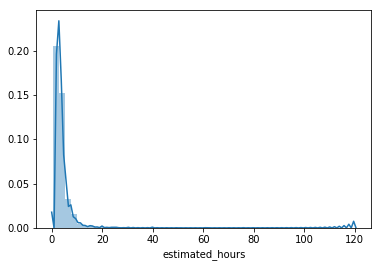

In [29]:
sns.distplot(raw_data['estimated_hours'], kde=True)
plt.show()

## Preparing Data for Regression

In [30]:
estimated_hours = raw_data['estimated_hours'].values
estimated_hours = (estimated_hours - estimated_hours.mean()) / estimated_hours.std()
print(estimated_hours.shape)
print(estimated_hours)

estimated_hours = estimated_hours.reshape([len(raw_data), 1])
print(estimated_hours.shape)

(101270,)
[-0.64797476  0.53447385 -0.18435223 ... -0.40048665  0.18221574
 -0.64448395]
(101270, 1)


In [31]:
feature_values = np.hstack((estimated_hours,doc_embeddings))
target_values = raw_data['price'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_values, target_values, test_size=0.3, random_state=1)


In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(type(X_train))
print(len(X_train))
print(type(y_train))
print(len(y_train))

(70889, 129)
(30381, 129)
(70889,)
(30381,)
<class 'numpy.ndarray'>
70889
<class 'numpy.ndarray'>
70889


In [33]:
target_values

array([ 90.,  27.,  75., ...,  30., 240.,  60.])

## Generating training batches

In [84]:
doc_pointer_X_train = 0
def generate_batch_ffnn(batch_size, feature_size):
    global doc_pointer_X_train
    batch = np.empty(shape=(batch_size, feature_size), dtype=np.float32)
    targets = np.empty(shape=(batch_size, 1), dtype=np.float32)

    doc_pointer_batch = 0
    while doc_pointer_batch < batch_size:
        batch[doc_pointer_batch] = X_train[doc_pointer_X_train]
        targets[doc_pointer_batch] = y_train[doc_pointer_X_train]
        doc_pointer_batch += 1
        doc_pointer_X_train = (doc_pointer_X_train + 1) % len(X_train)
    del doc_pointer_batch
    return batch, targets


## Defining the TF Graph for a 3-layer FFNN for Regression

In [85]:
batch_size_doc = 512
num_units_layer_1 = 318  #128
num_units_layer_2 = 318
feature_size = feature_values.shape[1]
print('feature_size={}'.format(feature_size))

train_input = tf.placeholder(tf.float32, shape=[batch_size_doc, feature_size])
train_targets = tf.placeholder(tf.float32, shape=[batch_size_doc, 1])

# layer 1 
W_1 = tf.Variable(
    tf.random_normal(shape=[feature_size, num_units_layer_1], stddev=0.5 / math.sqrt(batch_size_doc),
                     dtype=tf.float32))
b_1 = tf.Variable(
    tf.random_uniform(shape=[num_units_layer_1], minval=-1.0, maxval=1.0, dtype=tf.float32))
layer_1 = tf.add(tf.matmul(train_input, W_1), b_1)
layer_1 = tf.nn.relu(layer_1)

# layer 2
W_2 = tf.Variable(
    tf.random_normal(shape=[num_units_layer_1, num_units_layer_2], stddev=0.5 / math.sqrt(batch_size_doc),
                     dtype=tf.float32))
b_2 = tf.Variable(
    tf.random_uniform(shape=[num_units_layer_2], minval=-1.0, maxval=1.0, dtype=tf.float32))
layer_2 = tf.add(tf.matmul(layer_1, W_2), b_2)
layer_2 = tf.nn.relu(layer_2)

# Output layer
W_O = tf.Variable(
    tf.random_normal(shape=[num_units_layer_2, 1], stddev=0.5 / math.sqrt(batch_size_doc),
                     dtype=tf.float32))
b_O = tf.Variable(
    tf.random_uniform(shape=[1], minval=-1.0, maxval=1.0, dtype=tf.float32))
train_output = tf.add(tf.matmul(layer_2, W_O), b_O)

# Loss
loss2 = tf.reduce_mean(tf.square(train_targets - train_output))

# Optimizer
optimizer2 = tf.train.AdagradOptimizer(1).minimize(loss2)
# optimizer2 = tf.train.AdamOptimizer(0.001).minimize(loss2)
# optimizer2 = tf.train.GradientDescentOptimizer(0.001).minimize(loss2)


feature_size=129


## Running the FFNN model

In [86]:
batches_count_epoch = len(X_train) // batch_size_doc
num_steps = 100 * batches_count_epoch

print('batches_count_epoch={}\nnum_steps={}\n'.format(batches_count_epoch, num_steps))

session = tf.Session(config=tf.ConfigProto(allow_soft_placement=True))
# Initialize the variables in the graph
session.run(tf.global_variables_initializer())
print('Initialized')

for step in range(num_steps):
    batch_input, batch_targets = generate_batch_ffnn(batch_size_doc, feature_size)
    feed_dict = {train_input: batch_input, train_targets: batch_targets}
    _, l = session.run([optimizer2, loss2], feed_dict=feed_dict)

    if step % 20 == 0:
        print('Loss at step {}: {}'.format(step + 1, l))


batches_count_epoch=138
num_steps=13800



Initialized
Loss at step 1: 22579.046875


Loss at step 21: 16295.609375
Loss at step 41: 16248.4970703125


Loss at step 61: 27196.791015625
Loss at step 81: 22292.96484375


Loss at step 101: 14345.8330078125
Loss at step 121: 25822.25


Loss at step 141: 16493.4296875
Loss at step 161: 16370.80078125


Loss at step 181: 17052.03515625
Loss at step 201: 21242.984375


Loss at step 221: 23207.365234375
Loss at step 241: 15272.1875


Loss at step 261: 16345.388671875
Loss at step 281: 17360.986328125


Loss at step 301: 15263.3974609375
Loss at step 321: 17423.03515625


Loss at step 341: 19109.857421875
Loss at step 361: 17872.703125


Loss at step 381: 14450.548828125
Loss at step 401: 12823.1279296875


Loss at step 421: 16456.716796875
Loss at step 441: 9867.59375


Loss at step 461: 22036.068359375
Loss at step 481: 32450.9765625


Loss at step 501: 17019.14453125
Loss at step 521: 16616.42578125


Loss at step 541: 17118.58203125
Loss at step 561: 12590.966796875


Loss at step 581: 27653.11328125
Loss at step 601: 11232.84765625


Loss at step 621: 17581.357421875
Loss at step 641: 11780.8046875


Loss at step 661: 10577.0625
Loss at step 681: 14666.8935546875


Loss at step 701: 14070.4765625
Loss at step 721: 11002.765625


Loss at step 741: 15593.095703125
Loss at step 761: 10447.357421875


Loss at step 781: 10323.1669921875
Loss at step 801: 21067.2578125


Loss at step 821: 10580.001953125
Loss at step 841: 10822.126953125


Loss at step 861: 15706.91796875
Loss at step 881: 14380.306640625


Loss at step 901: 13349.1376953125


Loss at step 921: 27932.48046875
Loss at step 941: 16519.626953125


Loss at step 961: 11428.744140625
Loss at step 981: 12109.158203125


Loss at step 1001: 7739.55517578125
Loss at step 1021: 22312.4375


Loss at step 1041: 19037.974609375
Loss at step 1061: 21542.763671875


Loss at step 1081: 12351.931640625
Loss at step 1101: 15820.341796875


Loss at step 1121: 7663.291015625
Loss at step 1141: 14642.01171875


Loss at step 1161: 12385.3251953125
Loss at step 1181: 14838.1533203125


Loss at step 1201: 10426.173828125
Loss at step 1221: 16194.587890625


Loss at step 1241: 7713.94775390625
Loss at step 1261: 8526.861328125


Loss at step 1281: 11587.2490234375
Loss at step 1301: 11491.095703125


Loss at step 1321: 20018.984375
Loss at step 1341: 26600.28515625


Loss at step 1361: 17692.890625
Loss at step 1381: 18980.9140625


Loss at step 1401: 8413.474609375
Loss at step 1421: 9068.3056640625


Loss at step 1441: 10950.9306640625
Loss at step 1461: 9172.783203125


Loss at step 1481: 15361.6328125
Loss at step 1501: 17184.232421875


Loss at step 1521: 14829.4609375
Loss at step 1541: 10693.0654296875


Loss at step 1561: 11616.923828125
Loss at step 1581: 10037.0341796875


Loss at step 1601: 9080.8603515625
Loss at step 1621: 25873.263671875


Loss at step 1641: 11852.935546875
Loss at step 1661: 11505.451171875


Loss at step 1681: 15143.5322265625
Loss at step 1701: 8433.6669921875


Loss at step 1721: 11881.576171875
Loss at step 1741: 13325.71484375


Loss at step 1761: 10694.3447265625
Loss at step 1781: 17114.154296875


Loss at step 1801: 8829.4501953125
Loss at step 1821: 13012.873046875


Loss at step 1841: 10747.478515625
Loss at step 1861: 19233.02734375


Loss at step 1881: 16119.255859375
Loss at step 1901: 7904.19384765625


Loss at step 1921: 15741.390625
Loss at step 1941: 12819.923828125


Loss at step 1961: 14668.3876953125
Loss at step 1981: 12759.39453125


Loss at step 2001: 15640.765625
Loss at step 2021: 24852.244140625


Loss at step 2041: 7548.6884765625
Loss at step 2061: 10677.412109375


Loss at step 2081: 10639.421875
Loss at step 2101: 10970.291015625


Loss at step 2121: 9812.8427734375
Loss at step 2141: 12532.060546875


Loss at step 2161: 10953.302734375
Loss at step 2181: 11381.630859375


Loss at step 2201: 10112.775390625
Loss at step 2221: 11761.3203125


Loss at step 2241: 7895.9775390625
Loss at step 2261: 17071.349609375


Loss at step 2281: 21911.80078125
Loss at step 2301: 12211.0830078125


Loss at step 2321: 12224.7998046875
Loss at step 2341: 12949.3564453125


Loss at step 2361: 9927.9013671875
Loss at step 2381: 13440.9375


Loss at step 2401: 7311.3916015625
Loss at step 2421: 11658.74609375


Loss at step 2441: 10654.8515625
Loss at step 2461: 7481.619140625


Loss at step 2481: 7966.1591796875
Loss at step 2501: 11206.3056640625


Loss at step 2521: 8867.6533203125
Loss at step 2541: 8428.955078125


Loss at step 2561: 8826.208984375
Loss at step 2581: 9033.8134765625


Loss at step 2601: 10463.7275390625
Loss at step 2621: 7087.8779296875


Loss at step 2641: 8190.72802734375
Loss at step 2661: 10624.521484375


Loss at step 2681: 8221.380859375
Loss at step 2701: 9224.08203125


Loss at step 2721: 16079.916015625
Loss at step 2741: 10682.29296875


Loss at step 2761: 12225.7314453125
Loss at step 2781: 12641.2890625


Loss at step 2801: 7613.69873046875
Loss at step 2821: 11478.966796875


Loss at step 2841: 13622.5087890625
Loss at step 2861: 13686.78515625


Loss at step 2881: 11085.283203125
Loss at step 2901: 12660.30859375


Loss at step 2921: 7449.27294921875
Loss at step 2941: 10859.21875


Loss at step 2961: 9039.6171875
Loss at step 2981: 10356.703125


Loss at step 3001: 11448.654296875
Loss at step 3021: 9567.66015625


Loss at step 3041: 7523.173828125
Loss at step 3061: 7839.68798828125


Loss at step 3081: 10599.611328125
Loss at step 3101: 8499.734375


Loss at step 3121: 11762.255859375
Loss at step 3141: 16270.90625


Loss at step 3161: 14316.0966796875
Loss at step 3181: 17011.669921875


Loss at step 3201: 8391.697265625
Loss at step 3221: 7382.49072265625


Loss at step 3241: 14957.572265625
Loss at step 3261: 7880.4228515625


Loss at step 3281: 16234.296875
Loss at step 3301: 12001.498046875


Loss at step 3321: 10052.94140625
Loss at step 3341: 8306.884765625


Loss at step 3361: 9900.654296875
Loss at step 3381: 8342.884765625


Loss at step 3401: 9476.974609375
Loss at step 3421: 20523.458984375


Loss at step 3441: 10018.7861328125
Loss at step 3461: 7927.92529296875


Loss at step 3481: 10493.052734375
Loss at step 3501: 6466.744140625


Loss at step 3521: 9347.09765625
Loss at step 3541: 12249.3447265625


Loss at step 3561: 9054.921875
Loss at step 3581: 14618.2685546875


Loss at step 3601: 5824.87255859375
Loss at step 3621: 11489.1845703125


Loss at step 3641: 9532.927734375
Loss at step 3661: 12342.115234375


Loss at step 3681: 14364.998046875
Loss at step 3701: 5675.32421875


Loss at step 3721: 9753.3017578125
Loss at step 3741: 10286.14453125


Loss at step 3761: 7189.82080078125
Loss at step 3781: 8256.357421875


Loss at step 3801: 11789.458984375
Loss at step 3821: 20295.53515625


Loss at step 3841: 7734.87646484375
Loss at step 3861: 8109.943359375


Loss at step 3881: 8497.330078125
Loss at step 3901: 10412.744140625


Loss at step 3921: 8124.5126953125
Loss at step 3941: 9618.0478515625


Loss at step 3961: 7824.1748046875
Loss at step 3981: 11857.7099609375


Loss at step 4001: 5843.68310546875
Loss at step 4021: 9714.767578125


Loss at step 4041: 7118.2041015625
Loss at step 4061: 11847.93359375


Loss at step 4081: 14106.013671875
Loss at step 4101: 8090.197265625


Loss at step 4121: 7952.14892578125
Loss at step 4141: 8243.783203125


Loss at step 4161: 7514.9873046875
Loss at step 4181: 9947.8740234375


Loss at step 4201: 5994.453125
Loss at step 4221: 9972.2294921875


Loss at step 4241: 8400.68359375
Loss at step 4261: 6890.91796875


Loss at step 4281: 6569.45166015625
Loss at step 4301: 7062.2001953125


Loss at step 4321: 7425.2060546875
Loss at step 4341: 5985.3046875


Loss at step 4361: 11085.6103515625
Loss at step 4381: 7144.79345703125


Loss at step 4401: 9477.689453125
Loss at step 4421: 8314.0234375


Loss at step 4441: 5537.962890625
Loss at step 4461: 7195.9130859375


Loss at step 4481: 7016.81640625
Loss at step 4501: 6683.0703125


Loss at step 4521: 12826.4765625
Loss at step 4541: 7809.0888671875


Loss at step 4561: 9940.0712890625
Loss at step 4581: 11802.240234375


Loss at step 4601: 6003.09765625
Loss at step 4621: 7281.60693359375


Loss at step 4641: 12847.2919921875
Loss at step 4661: 9514.861328125


Loss at step 4681: 9319.005859375
Loss at step 4701: 9449.05859375


Loss at step 4721: 6303.51318359375
Loss at step 4741: 7420.65625


Loss at step 4761: 7906.6142578125
Loss at step 4781: 8555.142578125


Loss at step 4801: 9869.5712890625
Loss at step 4821: 7283.697265625


Loss at step 4841: 8900.1484375
Loss at step 4861: 6544.673828125


Loss at step 4881: 10006.53125
Loss at step 4901: 7270.03857421875


Loss at step 4921: 10091.755859375
Loss at step 4941: 12613.423828125


Loss at step 4961: 9298.4541015625
Loss at step 4981: 14380.0283203125


Loss at step 5001: 7507.15234375
Loss at step 5021: 5115.4521484375


Loss at step 5041: 13207.34765625
Loss at step 5061: 7759.85107421875


Loss at step 5081: 13121.0107421875
Loss at step 5101: 9366.4462890625


Loss at step 5121: 9318.2607421875
Loss at step 5141: 8174.01220703125


Loss at step 5161: 10131.802734375
Loss at step 5181: 7167.46533203125


Loss at step 5201: 8043.5419921875
Loss at step 5221: 18029.818359375


Loss at step 5241: 8297.734375
Loss at step 5261: 7028.13671875


Loss at step 5281: 7910.984375
Loss at step 5301: 5575.66943359375


Loss at step 5321: 7676.9453125
Loss at step 5341: 11003.6552734375


Loss at step 5361: 9612.552734375
Loss at step 5381: 7745.8154296875


Loss at step 5401: 4884.98486328125
Loss at step 5421: 9429.220703125


Loss at step 5441: 8279.8505859375
Loss at step 5461: 11889.8330078125


Loss at step 5481: 8671.15625
Loss at step 5501: 5007.8134765625


Loss at step 5521: 8939.7421875
Loss at step 5541: 7732.185546875


Loss at step 5561: 5866.4248046875
Loss at step 5581: 7161.82958984375


Loss at step 5601: 8866.2734375
Loss at step 5621: 14209.88671875


Loss at step 5641: 7455.35546875
Loss at step 5661: 6725.2509765625


Loss at step 5681: 8301.13671875
Loss at step 5701: 8790.84765625


Loss at step 5721: 6172.5908203125
Loss at step 5741: 8741.9951171875


Loss at step 5761: 7032.69287109375
Loss at step 5781: 10089.5107421875


Loss at step 5801: 5117.28369140625
Loss at step 5821: 7416.48583984375


Loss at step 5841: 6941.34130859375
Loss at step 5861: 9634.2763671875


Loss at step 5881: 9936.36328125
Loss at step 5901: 6521.96484375


Loss at step 5921: 5255.03515625
Loss at step 5941: 6830.76220703125


Loss at step 5961: 9594.78125
Loss at step 5981: 8847.4169921875


Loss at step 6001: 5806.8544921875
Loss at step 6021: 8276.0009765625


Loss at step 6041: 6911.4267578125
Loss at step 6061: 7591.91455078125


Loss at step 6081: 5469.16015625
Loss at step 6101: 6671.853515625


Loss at step 6121: 6284.9873046875
Loss at step 6141: 5259.2314453125


Loss at step 6161: 10028.345703125
Loss at step 6181: 7770.94091796875


Loss at step 6201: 7475.9755859375
Loss at step 6221: 7774.71728515625


Loss at step 6241: 5087.255859375
Loss at step 6261: 6221.9091796875


Loss at step 6281: 6843.0146484375
Loss at step 6301: 6394.35400390625


Loss at step 6321: 9562.033203125
Loss at step 6341: 6073.958984375


Loss at step 6361: 7935.6259765625
Loss at step 6381: 10417.783203125


Loss at step 6401: 6808.08349609375
Loss at step 6421: 6990.19677734375


Loss at step 6441: 12009.041015625
Loss at step 6461: 10240.82421875


Loss at step 6481: 7518.7666015625
Loss at step 6501: 9027.30859375


Loss at step 6521: 5572.6318359375
Loss at step 6541: 6416.85498046875


Loss at step 6561: 7144.572265625
Loss at step 6581: 8403.990234375


Loss at step 6601: 9231.0947265625
Loss at step 6621: 5608.09716796875


Loss at step 6641: 7909.15673828125
Loss at step 6661: 6216.0556640625


Loss at step 6681: 7342.9052734375
Loss at step 6701: 6453.482421875


Loss at step 6721: 8784.419921875
Loss at step 6741: 11884.48046875


Loss at step 6761: 6654.60107421875
Loss at step 6781: 11235.140625


Loss at step 6801: 6500.796875
Loss at step 6821: 4954.779296875


Loss at step 6841: 11848.544921875
Loss at step 6861: 7269.0576171875


Loss at step 6881: 11543.21484375
Loss at step 6901: 8292.1083984375


Loss at step 6921: 8562.306640625
Loss at step 6941: 7486.296875


Loss at step 6961: 5938.94140625
Loss at step 6981: 6111.39111328125


Loss at step 7001: 7091.4091796875
Loss at step 7021: 17287.708984375


Loss at step 7041: 6930.8115234375
Loss at step 7061: 6382.689453125


Loss at step 7081: 6950.2265625
Loss at step 7101: 4716.58740234375


Loss at step 7121: 6685.4326171875
Loss at step 7141: 5604.482421875


Loss at step 7161: 8313.39453125
Loss at step 7181: 6854.31689453125


Loss at step 7201: 4579.7373046875
Loss at step 7221: 8642.373046875


Loss at step 7241: 7885.705078125
Loss at step 7261: 11191.248046875


Loss at step 7281: 10225.8671875
Loss at step 7301: 5718.1572265625


Loss at step 7321: 8920.962890625
Loss at step 7341: 7502.484375


Loss at step 7361: 5726.521484375
Loss at step 7381: 6785.6611328125


Loss at step 7401: 8123.6943359375
Loss at step 7421: 13664.923828125


Loss at step 7441: 6699.97412109375
Loss at step 7461: 6450.0966796875


Loss at step 7481: 8406.8955078125
Loss at step 7501: 10532.365234375


Loss at step 7521: 6377.60546875
Loss at step 7541: 8031.0400390625


Loss at step 7561: 6812.50537109375
Loss at step 7581: 8472.66796875


Loss at step 7601: 5002.99853515625
Loss at step 7621: 6295.638671875


Loss at step 7641: 9646.994140625
Loss at step 7661: 7285.42236328125


Loss at step 7681: 9534.91015625
Loss at step 7701: 7465.9765625


Loss at step 7721: 5189.521484375
Loss at step 7741: 5350.5322265625


Loss at step 7761: 7761.97509765625
Loss at step 7781: 7903.7265625


Loss at step 7801: 4954.08203125
Loss at step 7821: 7676.22119140625


Loss at step 7841: 6173.35205078125
Loss at step 7861: 7212.357421875


Loss at step 7881: 5277.96923828125
Loss at step 7901: 6319.6533203125


Loss at step 7921: 5932.9990234375
Loss at step 7941: 5354.7099609375


Loss at step 7961: 8971.806640625
Loss at step 7981: 8112.24365234375


Loss at step 8001: 6678.47802734375
Loss at step 8021: 6694.169921875


Loss at step 8041: 5633.875
Loss at step 8061: 9956.0625


Loss at step 8081: 8562.7626953125
Loss at step 8101: 5882.666015625


Loss at step 8121: 8289.513671875
Loss at step 8141: 6053.796875


Loss at step 8161: 7439.43115234375
Loss at step 8181: 7663.857421875


Loss at step 8201: 6327.40576171875
Loss at step 8221: 6770.2607421875


Loss at step 8241: 10939.37890625
Loss at step 8261: 9396.279296875


Loss at step 8281: 5363.0283203125
Loss at step 8301: 7691.1962890625


Loss at step 8321: 4396.3427734375
Loss at step 8341: 5947.21240234375


Loss at step 8361: 7087.17919921875
Loss at step 8381: 7501.75634765625


Loss at step 8401: 7572.33935546875
Loss at step 8421: 5446.1240234375


Loss at step 8441: 6906.052734375
Loss at step 8461: 5830.9384765625


Loss at step 8481: 6400.2216796875
Loss at step 8501: 6133.64453125


Loss at step 8521: 8196.388671875
Loss at step 8541: 11164.201171875


Loss at step 8561: 6123.23876953125
Loss at step 8581: 10326.2763671875


Loss at step 8601: 5705.01171875
Loss at step 8621: 4703.0341796875


Loss at step 8641: 9803.953125
Loss at step 8661: 8122.36962890625


Loss at step 8681: 8345.5078125
Loss at step 8701: 7798.45947265625


Loss at step 8721: 4712.96875
Loss at step 8741: 6924.95361328125


Loss at step 8761: 5136.30078125
Loss at step 8781: 5341.841796875


Loss at step 8801: 6302.91748046875
Loss at step 8821: 17280.59375


Loss at step 8841: 6942.9794921875
Loss at step 8861: 5029.2197265625


Loss at step 8881: 6730.7138671875
Loss at step 8901: 6514.4013671875


Loss at step 8921: 5895.30859375
Loss at step 8941: 5327.45458984375


Loss at step 8961: 6621.01171875
Loss at step 8981: 6663.25244140625


Loss at step 9001: 4202.9814453125
Loss at step 9021: 7608.5498046875


Loss at step 9041: 7849.09423828125
Loss at step 9061: 11069.4873046875


Loss at step 9081: 9192.404296875
Loss at step 9101: 5700.93359375


Loss at step 9121: 8647.6328125
Loss at step 9141: 7013.416015625


Loss at step 9161: 5165.90625
Loss at step 9181: 6902.99853515625


Loss at step 9201: 7030.7392578125
Loss at step 9221: 12153.92578125


Loss at step 9241: 6220.20166015625
Loss at step 9261: 5134.4541015625


Loss at step 9281: 8054.91357421875
Loss at step 9301: 10255.89453125


Loss at step 9321: 5902.6162109375
Loss at step 9341: 5221.583984375


Loss at step 9361: 7553.439453125


Loss at step 9381: 7466.4052734375
Loss at step 9401: 8734.6572265625


Loss at step 9421: 5710.884765625
Loss at step 9441: 8478.7607421875


Loss at step 9461: 6580.1181640625
Loss at step 9481: 8622.4609375


Loss at step 9501: 7232.150390625
Loss at step 9521: 4890.13427734375


Loss at step 9541: 4839.1845703125
Loss at step 9561: 7159.78515625


Loss at step 9581: 7405.099609375
Loss at step 9601: 4779.4541015625


Loss at step 9621: 5952.96923828125
Loss at step 9641: 5772.95556640625


Loss at step 9661: 6843.154296875
Loss at step 9681: 4904.81640625


Loss at step 9701: 6767.111328125
Loss at step 9721: 5499.609375


Loss at step 9741: 5125.650390625
Loss at step 9761: 7749.83935546875


Loss at step 9781: 7896.70849609375
Loss at step 9801: 6602.9951171875


Loss at step 9821: 5850.17578125
Loss at step 9841: 5550.8564453125


Loss at step 9861: 8663.58984375
Loss at step 9881: 7872.787109375


Loss at step 9901: 5086.1083984375
Loss at step 9921: 7341.74072265625


Loss at step 9941: 4900.373046875
Loss at step 9961: 6137.517578125


Loss at step 9981: 7705.05517578125
Loss at step 10001: 5932.73046875


Loss at step 10021: 5839.201171875
Loss at step 10041: 9367.021484375


Loss at step 10061: 8303.080078125
Loss at step 10081: 5169.44384765625


Loss at step 10101: 6787.064453125
Loss at step 10121: 4558.9375


Loss at step 10141: 5357.12255859375
Loss at step 10161: 6505.76806640625


Loss at step 10181: 5870.578125
Loss at step 10201: 7493.4248046875


Loss at step 10221: 4800.0771484375
Loss at step 10241: 6425.10546875


Loss at step 10261: 5765.0
Loss at step 10281: 5327.1875


Loss at step 10301: 5716.0693359375
Loss at step 10321: 8066.3837890625


Loss at step 10341: 9749.802734375
Loss at step 10361: 6073.24609375


Loss at step 10381: 9614.1005859375
Loss at step 10401: 5361.71240234375


Loss at step 10421: 4501.0859375
Loss at step 10441: 8980.390625


Loss at step 10461: 7547.072265625
Loss at step 10481: 7134.55078125


Loss at step 10501: 7222.6513671875
Loss at step 10521: 4842.68994140625


Loss at step 10541: 7532.21533203125
Loss at step 10561: 5408.02587890625


Loss at step 10581: 5245.85107421875
Loss at step 10601: 5893.34765625


Loss at step 10621: 16883.7734375
Loss at step 10641: 7196.0849609375


Loss at step 10661: 4840.087890625
Loss at step 10681: 7233.51953125


Loss at step 10701: 4591.88525390625
Loss at step 10721: 5886.685546875


Loss at step 10741: 5414.498046875
Loss at step 10761: 6239.7138671875


Loss at step 10781: 5931.52734375
Loss at step 10801: 3928.40087890625


Loss at step 10821: 6020.4384765625
Loss at step 10841: 7222.92578125


Loss at step 10861: 7604.84716796875
Loss at step 10881: 7890.49462890625


Loss at step 10901: 5181.0078125
Loss at step 10921: 8011.017578125


Loss at step 10941: 5545.03564453125
Loss at step 10961: 4759.69580078125


Loss at step 10981: 6334.6650390625
Loss at step 11001: 5505.51513671875


Loss at step 11021: 10825.15625
Loss at step 11041: 7170.4365234375


Loss at step 11061: 4599.28515625
Loss at step 11081: 8526.5439453125


Loss at step 11101: 9229.3603515625
Loss at step 11121: 5477.423828125


Loss at step 11141: 4766.505859375
Loss at step 11161: 7346.66650390625


Loss at step 11181: 6783.27294921875
Loss at step 11201: 9204.7666015625


Loss at step 11221: 4065.211181640625
Loss at step 11241: 7412.5419921875


Loss at step 11261: 5786.4775390625
Loss at step 11281: 9001.9619140625


Loss at step 11301: 6535.54541015625
Loss at step 11321: 5260.40087890625


Loss at step 11341: 4955.57861328125
Loss at step 11361: 6671.1650390625


Loss at step 11381: 6490.49609375
Loss at step 11401: 4403.9580078125


Loss at step 11421: 5185.677734375
Loss at step 11441: 5475.236328125


Loss at step 11461: 5963.45703125
Loss at step 11481: 4999.44873046875


Loss at step 11501: 6758.7841796875
Loss at step 11521: 5552.984375


Loss at step 11541: 4598.77783203125
Loss at step 11561: 7066.69775390625


Loss at step 11581: 7738.58203125
Loss at step 11601: 6610.44482421875


Loss at step 11621: 5911.802734375
Loss at step 11641: 5230.33349609375


Loss at step 11661: 8212.75390625
Loss at step 11681: 14173.955078125


Loss at step 11701: 5303.9609375
Loss at step 11721: 6501.6513671875


Loss at step 11741: 5065.5302734375
Loss at step 11761: 6097.97216796875


Loss at step 11781: 7495.80224609375
Loss at step 11801: 5680.6181640625


Loss at step 11821: 5065.8310546875
Loss at step 11841: 9018.6845703125


Loss at step 11861: 8174.5234375
Loss at step 11881: 4675.5283203125


Loss at step 11901: 6988.52490234375
Loss at step 11921: 4931.66650390625


Loss at step 11941: 4496.3154296875
Loss at step 11961: 6414.56298828125


Loss at step 11981: 5478.12060546875
Loss at step 12001: 7505.28515625


Loss at step 12021: 4506.52734375
Loss at step 12041: 6251.1103515625


Loss at step 12061: 5644.52685546875
Loss at step 12081: 5055.83740234375


Loss at step 12101: 5578.2548828125
Loss at step 12121: 8544.310546875


Loss at step 12141: 8714.6875
Loss at step 12161: 5738.0869140625


Loss at step 12181: 9718.9599609375
Loss at step 12201: 5084.7529296875


Loss at step 12221: 4577.611328125
Loss at step 12241: 8615.13671875


Loss at step 12261: 8082.0078125
Loss at step 12281: 6557.23681640625


Loss at step 12301: 7132.2880859375
Loss at step 12321: 4409.3828125


Loss at step 12341: 6960.4658203125
Loss at step 12361: 4860.48779296875


Loss at step 12381: 5040.0234375
Loss at step 12401: 6138.48046875


Loss at step 12421: 16880.080078125
Loss at step 12441: 7030.6689453125


Loss at step 12461: 4624.3115234375
Loss at step 12481: 7099.68212890625


Loss at step 12501: 4425.5654296875
Loss at step 12521: 5044.876953125


Loss at step 12541: 5031.4873046875
Loss at step 12561: 5870.7763671875


Loss at step 12581: 4283.32470703125
Loss at step 12601: 3961.52734375


Loss at step 12621: 5399.14111328125
Loss at step 12641: 6869.43505859375


Loss at step 12661: 7161.8447265625
Loss at step 12681: 6954.08544921875


Loss at step 12701: 5150.08056640625
Loss at step 12721: 7060.388671875


Loss at step 12741: 4941.5322265625
Loss at step 12761: 4899.966796875


Loss at step 12781: 4917.3486328125
Loss at step 12801: 4622.43603515625


Loss at step 12821: 10617.634765625
Loss at step 12841: 6568.6904296875


Loss at step 12861: 4550.271484375
Loss at step 12881: 7877.92138671875


Loss at step 12901: 8336.4609375
Loss at step 12921: 5084.42626953125


Loss at step 12941: 4478.68115234375
Loss at step 12961: 7230.9775390625


Loss at step 12981: 6416.439453125
Loss at step 13001: 9322.0


Loss at step 13021: 4258.79541015625
Loss at step 13041: 7213.54736328125


Loss at step 13061: 5162.73974609375
Loss at step 13081: 6472.5654296875


Loss at step 13101: 6308.9228515625
Loss at step 13121: 5533.51708984375


Loss at step 13141: 4914.9140625
Loss at step 13161: 6669.5927734375


Loss at step 13181: 5867.876953125
Loss at step 13201: 4555.9072265625


Loss at step 13221: 5295.25830078125
Loss at step 13241: 5646.57568359375


Loss at step 13261: 5447.119140625
Loss at step 13281: 4119.47998046875


Loss at step 13301: 6922.6943359375
Loss at step 13321: 5368.80517578125


Loss at step 13341: 4249.318359375
Loss at step 13361: 6551.673828125


Loss at step 13381: 12805.5234375
Loss at step 13401: 6652.38330078125


Loss at step 13421: 5683.189453125
Loss at step 13441: 5034.642578125


Loss at step 13461: 8202.162109375
Loss at step 13481: 13705.04296875


Loss at step 13501: 6198.10693359375
Loss at step 13521: 6159.6376953125


Loss at step 13541: 6337.3056640625
Loss at step 13561: 5414.54052734375


Loss at step 13581: 7449.892578125
Loss at step 13601: 5722.4853515625


Loss at step 13621: 4967.83154296875
Loss at step 13641: 7507.0595703125


Loss at step 13661: 9292.900390625
Loss at step 13681: 3933.431884765625


Loss at step 13701: 6403.34228515625
Loss at step 13721: 5069.638671875


Loss at step 13741: 3952.114501953125
Loss at step 13761: 5991.9091796875


Loss at step 13781: 5435.3125


## Making Price Predictions on Test Data

In [87]:
feed_dict = {train_input: X_test[0:batch_size_doc]}
result = session.run(train_output, feed_dict)

result = np.int32(result)
result = result.reshape([batch_size_doc, ])

comp = np.empty([2, 10])
comp[0] = result[0:10]
comp[1] = y_test[0:10]
comp


array([[ 85.,  82.,  41.,  61.,  79., 128., 109.,   9.,  54., 157.],
       [100., 100.,  60., 100.,  50., 950., 100.,  35., 130., 125.]])

 82   94    82  61    92  192  46    15  82   140]
[100. 100.  60. 100.  50. 950. 100.  35. 130. 125.]

In [88]:
session.close()